In [2]:
import numpy as np
import pickle
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
#get classical kernel
from sklearn.metrics.pairwise import rbf_kernel

In [5]:
import os 
from scipy.stats import entropy
from Kernels.src.Preprocessing import Load_kernels
from Kernels.src.kernels_classic import Compute_rbf_kernel

In [6]:
 #calculate the Jensen-Shannon divergence
def js_div(vector1, vector2, bins = 50):
    # Calculate the histograms or PMFs of vector1 and vector2
    hist1, _ = np.histogram(vector1, bins= 50, density=True)
    hist2, _ = np.histogram(vector2, bins= 50, density=True)
    # Compute the average distribution
    average_distribution = 0.5 * (hist1 + hist2)
    # Calculate JSD
    jsd = 0.5 * (entropy(hist1, average_distribution) + entropy(hist2, average_distribution))
    return jsd


In [7]:
def Prepare_data(df_k_trend_100):
    df_k_trend_100_plot=df_k_trend_100.copy()
    df_k_trend_100_plot.rename(columns={'Concentration':'kernel variance','silhouette':'Silhouette index'},inplace=True)
    idx_to_drop=df_k_trend_100_plot.loc[(df_k_trend_100_plot.ftmap=='rbf') & (df_k_trend_100_plot['Max angle']!=0.39)].index
    df_k_trend_100_plot.drop(idx_to_drop,axis=0,inplace=True)
    df_k_trend_100_plot['Class'] = df_k_trend_100_plot[['ftmap', 'Max angle']].astype(str).agg('-'.join, axis=1)
    df_k_trend_100_plot['Class'].replace('rbf-0.39','rbf',inplace=True)
    df_k_trend_100_plot=df_k_trend_100_plot.loc[df_k_trend_100_plot.K==3]
    df_k_trend_100_plot.set_index('Class',drop=False,inplace=True)
    return df_k_trend_100_plot


# Unsupervised


## 4 qubit

In [8]:
out_dir='Results/Unsupervised_{}_umap/'
df_k_trend_100=pd.read_csv(out_dir.format(100)+'clustering_{}_opt_k_reviewed.csv'.format(100))
df_k_trend_1000=pd.read_csv(out_dir.format(1000)+'clustering_{}_opt_k_reviewed.csv'.format(1000))


Zfeaturemap does not have any entanglement--> Z
Substitute Z_full with Z

In [9]:
#Replace
df_k_trend_100.replace('Z_full','Z',inplace=True)
df_k_trend_1000.replace('Z_full','Z',inplace=True)


In [10]:
df_k_trend_100[df_k_trend_100['ftmap']=='Z']

,Unnamed: 0,ftmap,K,Bandwidth,s,geom_distance,concentration,silhouette,Score_cluster,v_intra,v_inter,N_samples
90,90,Z,2,0.125,20715.494245,10.002698,0.002107,0.309270,0.356552,0.016808,0.032008,100
91,91,Z,3,0.125,20715.494245,10.002698,0.002107,0.370815,0.546736,0.004052,0.041148,100
92,92,Z,4,0.125,20715.494245,10.002698,0.002107,0.307560,0.549812,0.002500,0.032499,100
93,93,Z,5,0.125,20715.494245,10.002698,0.002107,0.324850,0.580569,0.002650,0.030254,100
94,94,Z,6,0.125,20715.494245,10.002698,0.002107,0.242622,0.574238,0.002146,0.029232,100
95,95,Z,7,0.125,20715.494245,10.002698,0.002107,0.169540,0.558751,0.003036,0.028462,100
96,96,Z,8,0.125,20715.494245,10.002698,0.002107,0.134134,0.581681,0.002227,0.027953,100
97,97,Z,9,0.125,20715.494245,10.002698,0.002107,0.148306,0.603009,0.002262,0.027593,100
98,98,Z,10,0.125,20715.494245,10.002698,0.002107,0.115955,0.565521,0.003585,0.027380,100
99,99,Z,2,0.250,22750.779450,5.379752,0.019800,0.339673,0.393861,0.020846,0.039884,100


In [11]:
df_k_trend_1000.rename(columns={'Bandwidth':'Max angle'},inplace=True)
df_k_trend_100.rename(columns={'Bandwidth':'Max angle'},inplace=True)

df_k_trend_100['feature maps']=df_k_trend_100['ftmap'].astype('category')
df_k_trend_1000['feature maps']=df_k_trend_1000['ftmap'].astype('category')

df_k_trend_100['Max angle']=df_k_trend_100['Max angle']*np.pi
df_k_trend_1000['Max angle']=df_k_trend_1000['Max angle']*np.pi

df_k_trend_100['Max angle']=df_k_trend_100['Max angle'].round(2)
df_k_trend_1000['Max angle']=df_k_trend_1000['Max angle'].round(2)

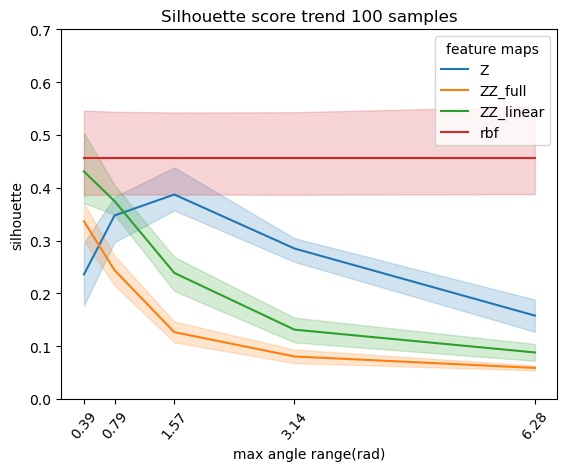

In [12]:
sns.lineplot(data=df_k_trend_100,
             x="Max angle",
             y="silhouette",
             hue='feature maps')
plt.title('Silhouette score trend 100 samples')
plt.xlabel('max angle range(rad)')
plt.ylim(0,0.7)
plt.xticks(df_k_trend_1000['Max angle'].unique(),rotation=50)
plt.savefig(out_dir.format(100)+'clustering_trend.png')
plt.show()




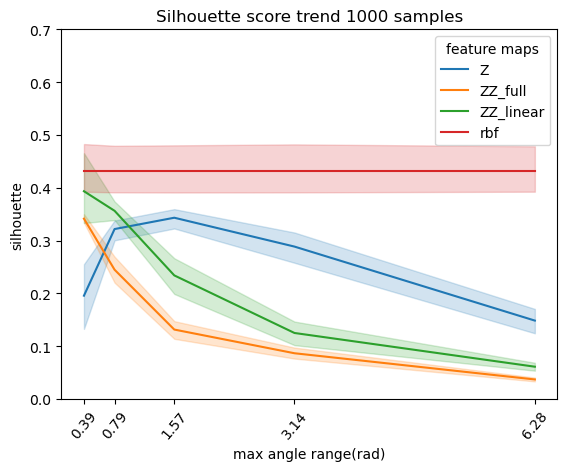

In [13]:
sns.lineplot(data=df_k_trend_1000,
             x="Max angle",
             y="silhouette",
             hue='feature maps')
plt.title('Silhouette score trend {} samples'.format(1000))
plt.xlabel('max angle range(rad)')
plt.ylim(0,0.7)
plt.xticks(df_k_trend_1000['Max angle'].unique(),rotation=50)
plt.savefig(out_dir.format(1000)+'clustering_trend.png')
plt.show()




In [14]:
order=['rbf']
for i in ['Z', 'ZZ_linear','ZZ_full']:
    for j in df_k_trend_100['Max angle'].unique().tolist():
        order.append(i+'-'+str(j))
        
        
        

In [15]:
df_k_trend_100_plot=Prepare_data(df_k_trend_100)
df_k_trend_1000_plot=Prepare_data(df_k_trend_1000)


In [16]:
df_k_trend_1000

,Unnamed: 0,ftmap,K,Max angle,s,geom_distance,concentration,silhouette,Score_cluster,v_intra,v_inter,N_samples,feature maps
0,0,rbf,2,0.39,74501.173166,2.500972,0.029959,0.542565,0.548716,0.019163,0.025802,1000,rbf
1,1,rbf,3,0.39,74501.173166,2.500972,0.029959,0.572370,0.620737,0.008170,0.032906,1000,rbf
2,2,rbf,4,0.39,74501.173166,2.500972,0.029959,0.419561,0.616219,0.005853,0.032249,1000,rbf
3,3,rbf,5,0.39,74501.173166,2.500972,0.029959,0.404097,0.652419,0.005026,0.030578,1000,rbf
4,4,rbf,6,0.39,74501.173166,2.500972,0.029959,0.392686,0.680109,0.004570,0.030022,1000,rbf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,ZZ_linear,6,6.28,95407.786367,30.625621,0.012059,0.059177,0.092081,0.024971,0.006753,1000,ZZ_linear
176,176,ZZ_linear,7,6.28,95407.786367,30.625621,0.012059,0.066313,0.108621,0.027800,0.006833,1000,ZZ_linear
177,177,ZZ_linear,8,6.28,95407.786367,30.625621,0.012059,0.071467,0.120354,0.030029,0.006863,1000,ZZ_linear
178,178,ZZ_linear,9,6.28,95407.786367,30.625621,0.012059,0.078879,0.129285,0.032118,0.006810,1000,ZZ_linear


In [17]:
# Default outer join
df= pd.concat([df_k_trend_100_plot, df_k_trend_1000_plot], axis=0)


In [18]:
df

,Unnamed: 0,ftmap,K,Max angle,s,geom_distance,concentration,Silhouette index,Score_cluster,v_intra,v_inter,N_samples,feature maps,Class
Class,,,,,,,,,,,,,,
rbf,1,rbf,3,0.39,17881.043575,1.751525,0.040536,0.578659,0.669947,0.006730,0.050097,100,rbf,rbf
ZZ_full-0.39,46,ZZ_full,3,0.39,17351.224333,3.224379,0.059027,0.384936,0.460014,0.033262,0.031810,100,ZZ_full,ZZ_full-0.39
ZZ_full-0.79,55,ZZ_full,3,0.79,8202.609678,3.549317,0.037520,0.184930,0.224053,0.044597,0.019922,100,ZZ_full,ZZ_full-0.79
ZZ_full-1.57,64,ZZ_full,3,1.57,7190.863482,3.135741,0.017421,0.094629,0.110736,0.024336,0.009465,100,ZZ_full,ZZ_full-1.57
ZZ_full-3.14,73,ZZ_full,3,3.14,5075.361037,4.360666,0.009879,0.055087,0.070453,0.016010,0.005306,100,ZZ_full,ZZ_full-3.14
ZZ_full-6.28,82,ZZ_full,3,6.28,3529.300039,6.296133,0.009456,0.046005,0.055732,0.016266,0.005045,100,ZZ_full,ZZ_full-6.28
Z-0.39,91,Z,3,0.39,20715.494245,10.002698,0.002107,0.370815,0.546736,0.004052,0.041148,100,Z,Z-0.39
Z-0.79,100,Z,3,0.79,22750.779450,5.379752,0.019800,0.396351,0.538878,0.008011,0.047660,100,Z,Z-0.79
Z-1.57,109,Z,3,1.57,16543.106290,2.172967,0.067120,0.341164,0.412230,0.033050,0.070093,100,Z,Z-1.57


In [19]:
df.rename(columns={'Class':'Class_'},inplace=True)
df.Class_=pd.Categorical(df.Class_,categories=order)
df=df.sort_values('Class_')

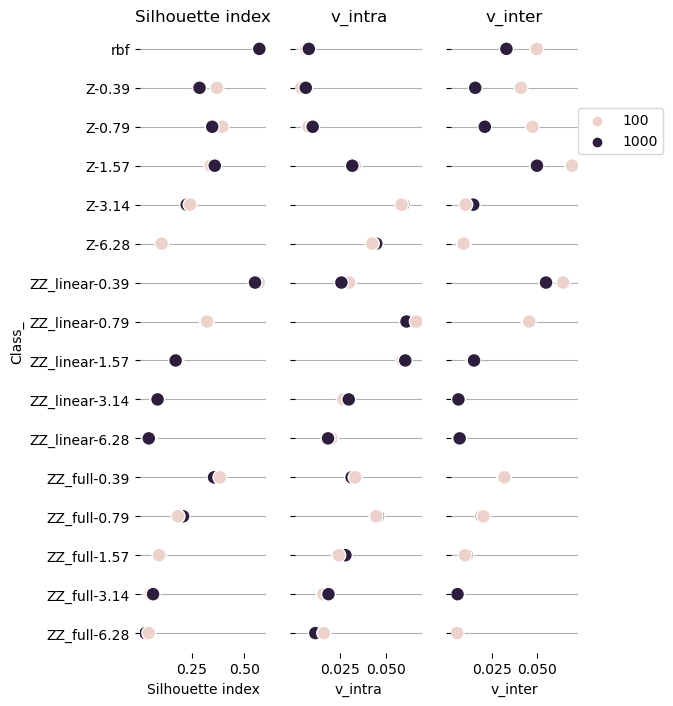

In [20]:
plt.close()
# Make the PairGrid
g = sns.PairGrid(df,
                 x_vars=['Silhouette index','v_intra','v_inter'], y_vars=["Class_"],
                 hue='N_samples',
                 height=7, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['Silhouette index','v_intra','v_inter']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.legend(loc=(1,0.8))
plt.show()


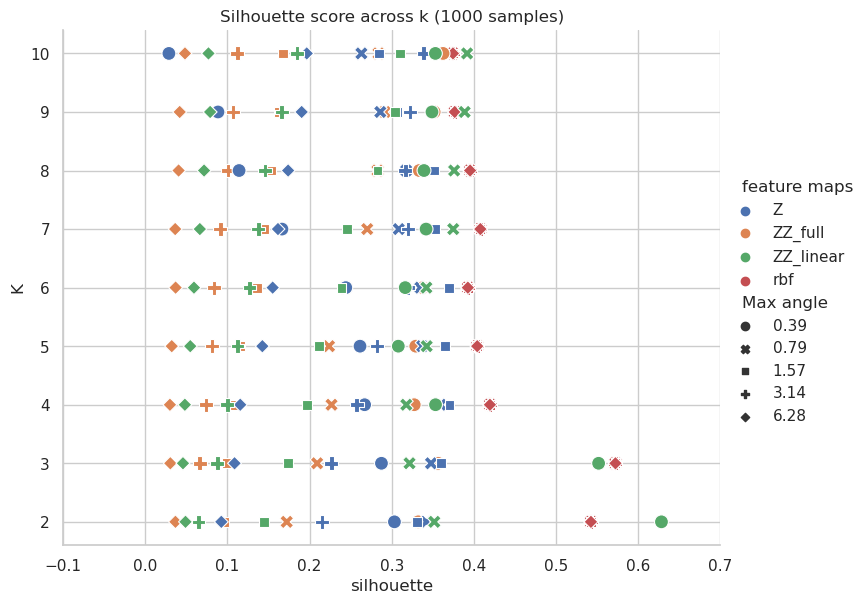

In [21]:
plt.close()
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_k_trend_1000,
    style="Max angle", x="silhouette",
    hue="feature maps",
    y="K",s=100,
    sizes=(10, 200),
    height=6, aspect=1.25,
    
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlim(-0.1,0.7)
#g.despine(left=True, bottom=True)



plt.title('Silhouette score across k ({} samples)'.format(df_k_trend_1000.N_samples[0]))
#plt.xlabel('Number of Clusters')
# Show the plot
plt.savefig(out_dir.format(1000)+'opt_k.png')
plt.show()


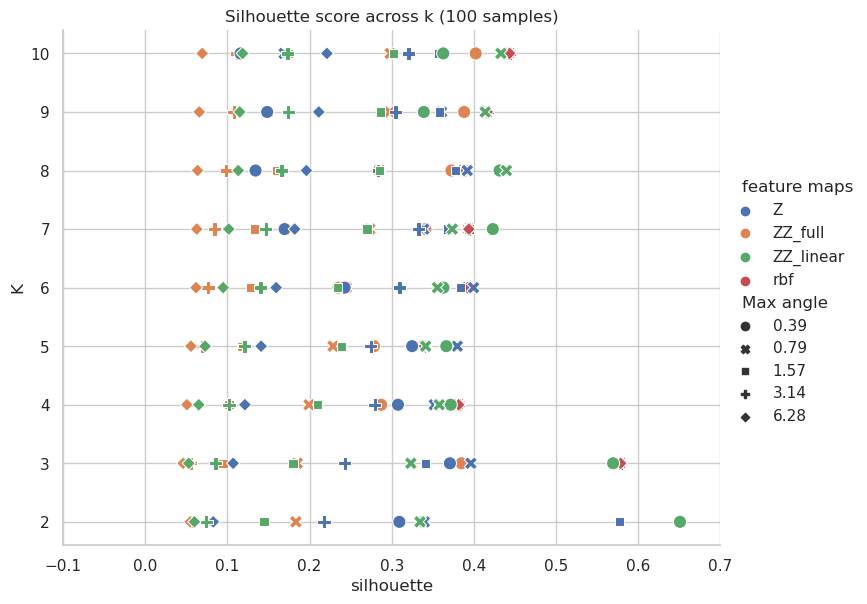

In [22]:
plt.close()
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_k_trend_100,
    style="Max angle", x="silhouette",
    hue="feature maps",
    y="K",s=90,
    sizes=(10, 200),
    height=6, aspect=1.25,
    
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
#g.despine(left=True, bottom=True)
g.ax.set_xlim(-0.1,0.7)


plt.title('Silhouette score across k ({} samples)'.format(df_k_trend_100.N_samples[0]))
#plt.xlabel('Number of Clusters')
# Show the plot
plt.savefig(out_dir.format(df_k_trend_100.N_samples[0])+'opt_k.png')
plt.show()


In [23]:
df


,Unnamed: 0,ftmap,K,Max angle,s,geom_distance,concentration,Silhouette index,Score_cluster,v_intra,v_inter,N_samples,feature maps,Class_
Class,,,,,,,,,,,,,,
rbf,1,rbf,3,0.39,17881.043575,1.751525,0.040536,0.578659,0.669947,0.006730,0.050097,100,rbf,rbf
rbf,1,rbf,3,0.39,74501.173166,2.500972,0.029959,0.572370,0.620737,0.008170,0.032906,1000,rbf,rbf
Z-0.39,91,Z,3,0.39,20715.494245,10.002698,0.002107,0.370815,0.546736,0.004052,0.041148,100,Z,Z-0.39
Z-0.39,91,Z,3,0.39,212056.597796,16.760649,0.001171,0.287468,0.396826,0.006498,0.015253,1000,Z,Z-0.39
Z-0.79,100,Z,3,0.79,22750.779450,5.379752,0.019800,0.396351,0.538878,0.008011,0.047660,100,Z,Z-0.79
Z-0.79,100,Z,3,0.79,154580.798965,8.371354,0.012575,0.347842,0.459347,0.010255,0.020668,1000,Z,Z-0.79
Z-1.57,109,Z,3,1.57,16543.106290,2.172967,0.067120,0.341164,0.412230,0.033050,0.070093,100,Z,Z-1.57
Z-1.57,109,Z,3,1.57,84656.073746,2.749633,0.057831,0.359981,0.393917,0.031698,0.050218,1000,Z,Z-1.57
Z-3.14,118,Z,3,3.14,80191.672618,5.036956,0.058655,0.226454,0.188576,0.059263,0.014122,1000,Z,Z-3.14


## Effect of concentration

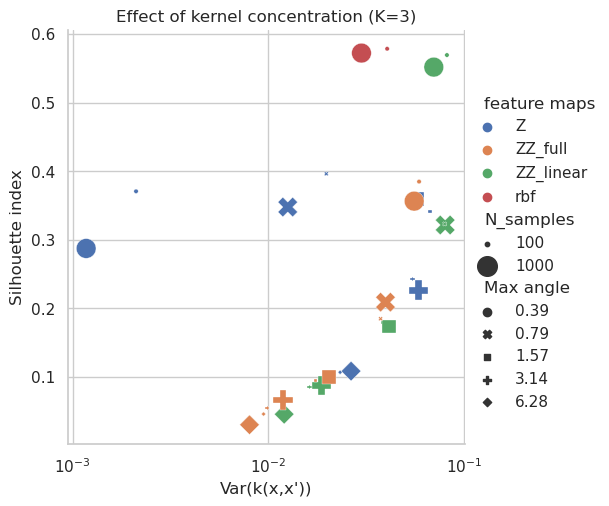

In [24]:
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df[df.K==3],
    #size="K",
    x="concentration", y="Silhouette index",
    hue="feature maps", style="Max angle",
    size="N_samples",
    sizes=(10, 200)
)
g.set(xscale="log",
      xlabel="Var(k(x,x'))",
      title="Effect of kernel concentration (K=3)")

#g.ax.xaxis.grid(True, "minor", linewidth=.25)
#g.ax.yaxis.grid(True, "minor", linewidth=.25)
#g.despine(left=True, bottom=True)

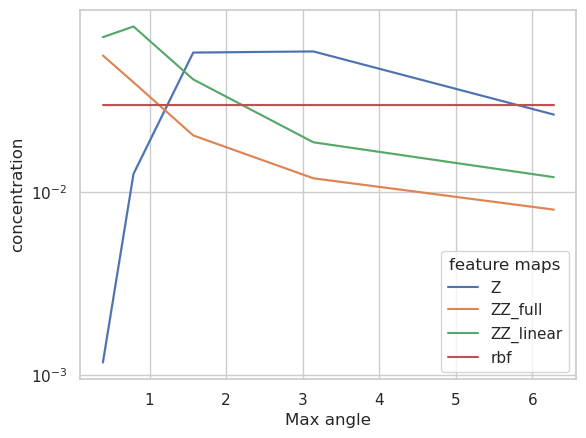

In [25]:
gg=sns.lineplot(data=df_k_trend_1000,
             y="concentration",
             x="Max angle",
             hue='feature maps')
gg.set(yscale="log")
#plt.title('Silhouette score trend 1000 samples')
#plt.xlabel('')
#plt.ylim(0,0.7)
#plt.xticks(df_k_trend_1000['Max angle'].unique(),rotation=50)
plt.savefig(out_dir.format(1000)+'clustering_trend.png')
plt.show()



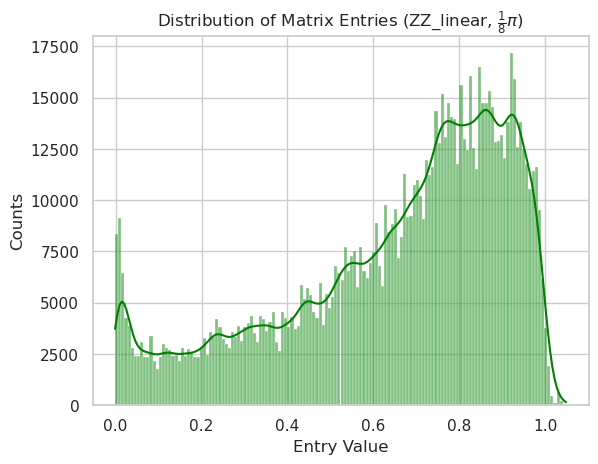

In [26]:
best_qk=Load_kernels('Kernels_Results/Unsupervised_1000_umap/ZZ_linear/qk_tot_0.125.pickle')
matrix_entries=best_qk.flatten()

# Create a histogram of the matrix entries using Seaborn
sns.histplot(matrix_entries, bins='auto',kde=True, color='green')
plt.title(r'Distribution of Matrix Entries (ZZ_linear, $\frac{1}{8}\pi$)')
plt.xlabel('Entry Value')
plt.ylabel('Counts')

# Show the plot
plt.show()

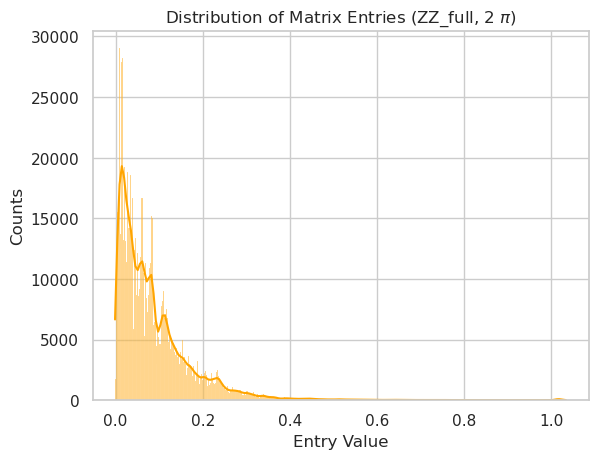

In [27]:
worst_qk=Load_kernels('Kernels_Results/Unsupervised_1000_umap/ZZ_full/qk_tot_2.pickle')
matrix_entries=worst_qk.flatten()

# Create a histogram of the matrix entries using Seaborn
sns.histplot(matrix_entries, bins='auto',kde=True, color='orange')
plt.title(r'Distribution of Matrix Entries (ZZ_full, 2 $\pi$)')
plt.xlabel('Entry Value')
plt.ylabel('Counts')

# Show the plot
plt.show()

## Sampling consistency

In [48]:
emb='UMAP'
data_input = pd.read_csv("Input_data/UMAP_METABRIC_4cmp_IC10_full.csv", sep = ",",index_col=0)

In [49]:
#SELECT FT
n_qubits=4
features=[]
if emb=='PCA':
    for i in range(1,int(n_qubits/2)+1):
        name_cna='Component_'+str(i)+'_cna'
        name_exp='Component_'+str(i)+'_exp'
        features.append(name_cna)
        features.append(name_exp)
else:
    for i in range(1,int(n_qubits)+1):
        name_='Component_'+str(i)
        features.append(name_)
        
labels = 'IntClustMemb'
print(features)

########SAMPLING###################################
#1000 samples
df_1000=data_input.sample(n=1000,random_state=42)
y_train_1000=df_1000[labels].to_numpy()
X_train_1000=df_1000[features]
#100 samples
df_100=data_input.sample(n=100,random_state=42)
y_train_100=df_100[labels].to_numpy()
X_train_100=df_100[features]

['Component_1', 'Component_2', 'Component_3', 'Component_4']


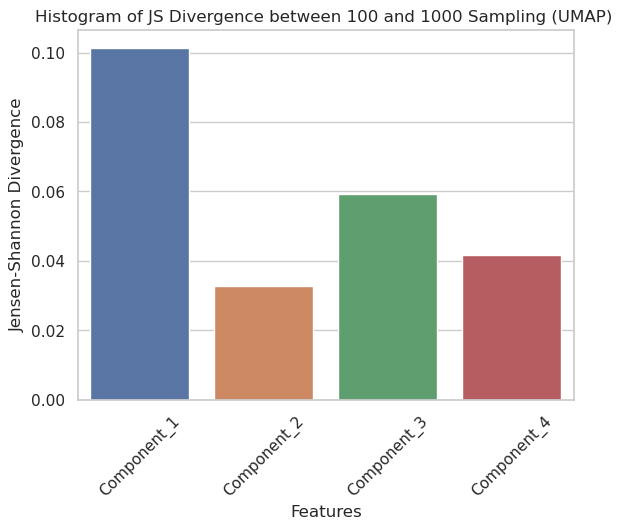

In [51]:
#features è la lista delle feature dei dati su cui vuoi calcolare la JSD
jsd_dict = {}
for col in features:
    d1 = X_train_100[col].to_numpy()
    d2 = X_train_1000[col].to_numpy()
    jsd_dict[col] = js_div(d1, d2)
#JSD = 0 --> distribuzioni completamente uguali
#JSD = 1 --> distribuzioni completamente diverse
#Plotta la divergenza calcolata prima con matplotlib
keys = list(jsd_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(jsd_dict[k]) for k in keys]
sns.barplot(x=keys, y=vals)
plt.tick_params(axis='x', rotation=45)
plt.ylabel('Jensen-Shannon Divergence')
plt.xlabel('Features')
plt.title('Histogram of JS Divergence between 100 and 1000 Sampling (UMAP) ')
plt.show()

## 6 qubit -1000 samples

In [11]:
#Load
df_k_trend_1000_3q=pd.read_csv('Results/Unsupervised_1000_3q/clustering_1000_opt_k_reviewed.csv')
###Prepare for plots###
#Replace
df_k_trend_1000_3q.replace('Z_full','Z',inplace=True)
#Adjust df
df_k_trend_1000_3q.rename(columns={'Bandwidth':'Max angle'},inplace=True)
df_k_trend_1000_3q['feature maps']=df_k_trend_100['ftmap'].astype('category')
#Correct bandwidth
df_k_trend_1000_3q['Max angle']=df_k_trend_1000['Max angle']*np.pi
df_k_trend_1000_3q['Max angle']=df_k_trend_1000['Max angle'].round(2)

Plot trend


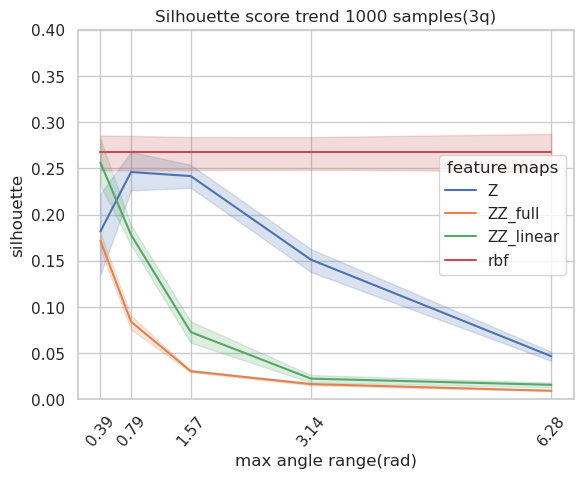

In [104]:
sns.lineplot(data=df_k_trend_1000_3q,
             x="Max angle",
             y="silhouette",
             hue='feature maps')
plt.title('Silhouette score trend {} samples(3q)'.format(1000))
plt.xlabel('max angle range(rad)')
plt.ylim(0,0.4)
plt.xticks(df_k_trend_1000['Max angle'].unique(),rotation=50)
plt.show()


Plot full results

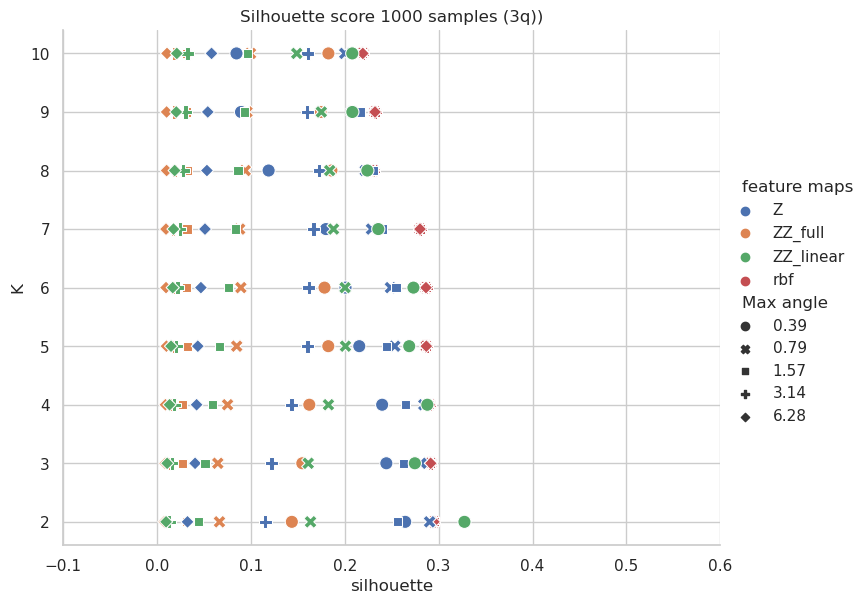

In [105]:
plt.close()
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_k_trend_1000_3q,
    style="Max angle", x="silhouette",
    hue="feature maps",
    y="K",s=90,
    sizes=(10, 200),
    height=6, aspect=1.25,
    
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
#g.despine(left=True, bottom=True)
g.ax.set_xlim(-0.1,0.6)


plt.title('Silhouette score 1000 samples (3q))')
#plt.xlabel('Number of Clusters')
# Show the plot
plt.savefig('Results/Unsupervised_1000_3q/opt_k_1000_3q.png')
plt.show()

## New Clusters

- ZZ linear(0.39) k=2

- Z(1.57) k=8

In [15]:
def Scale(x, out_range=(-1, 1), axis=None):
    domain = np.min(x, axis), np.max(x, axis)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2


In [16]:
data_input = pd.read_csv("Input_data/PCA_METABRIC_10cmp_IC10_full.csv", sep = ",",index_col=0)

In [25]:
data_input=data_input.sample(n=1000,axis=0,random_state=42)

In [26]:
df_new_clust=pd.DataFrame()
df_new_clust.index=data_input.index

In [23]:
#ZZ_linear(0.39)
q_ZZ_linear_039=Load_kernels('Kernels_Results/Unsupervised_1000/ZZ_linear/qk_tot_0.125.pickle')


In [19]:
spectral_2 = SpectralClustering(2, affinity="precomputed",n_init=10,random_state=42)
cluster_labels_2 = spectral_2.fit_predict(q_ZZ_linear_039)

In [20]:
q_k_dist=1-Scale(q_ZZ_linear_039,(0,1))
np.fill_diagonal(q_k_dist,0)
silhouette_score(q_k_dist,metric='precomputed',labels=cluster_labels_2,random_state=42)

0.43194860488470166

In [27]:
df_new_clust

""
MB-2957
MB-7116
MB-3035
MB-2610
MB-2953
...
MB-0465
MB-0439
MB-5592
MB-3452


In [28]:
df_new_clust['ZZ_linear_039']=cluster_labels_2


In [ ]:
#Z 1.57 k=8
q_Z_079=Load_kernels('../Kernels_Results/Bandwidth/Full_data/Z_linear/bandwidth_k/qk_tot_pi_0.79.pickle')
spectral_8 = SpectralClustering(8, affinity="precomputed",n_init=10,random_state=42)
cluster_labels_8 = spectral_8.fit_predict(q_Z_079)

df_new_clust['Z_039']=cluster_labels_8

RBF 1000

In [31]:
#get classical kernel
#SELECT FT
n_qubits=4
features=[]
for i in range(1,int(n_qubits/2)+1):
    name_cna='Component_'+str(i)+'_cna'
    name_exp='Component_'+str(i)+'_exp'
    features.append(name_cna)
    features.append(name_exp)
labels = 'IntClustMemb'
print(features)

########SAMPLING###################################
df_tot_sel=data_input.sample(n=1000,random_state=42)
y_train=df_tot_sel[labels].to_numpy()
X_train=df_tot_sel[features]
K_classic_tr = Compute_rbf_kernel(X_train,X_train)

['Component_1_cna', 'Component_1_exp', 'Component_2_cna', 'Component_2_exp']


In [32]:
spectral_2_rbf = SpectralClustering(2, affinity="precomputed",n_init=10,random_state=42)
cluster_labels_2_rbf = spectral_2_rbf.fit_predict(K_classic_tr)


In [34]:
df_new_clust.to_csv('Results/Unsupervised_1000/New_cluster_quantum_metabric.csv',sep=',')

# Supervised + altro

### Accuracy and other metrics

In [8]:
df_supervised_1000=pd.read_csv('Results/Supervised_1000/Supervised_results_1000.csv')
df_supervised_1980=pd.read_csv('Results/Supervised_1980/Supervised_results_1980.csv')

df_supervised_1000.replace('Z_full','Z',inplace=True)
df_supervised_1000['feature maps']=df_supervised_1000['ftmap'].astype('category')

df_supervised_1980.replace('Z_full','Z',inplace=True)
df_supervised_1980['feature maps']=df_supervised_1980['ftmap'].astype('category')



In [9]:
df_supervised_1000.rename(columns={'train_error':'train','test_error':'test'},inplace=True)
df_supervised_1980.rename(columns={'train_error':'train','test_error':'test'},inplace=True)

Melt data

In [10]:
df_sup_melt_1000=pd.melt(df_supervised_1000,id_vars=["Bandwidth","feature maps","N_classes"],value_vars=["test","train"])
df_sup_melt_1000.rename(columns={'variable':'train/test','value':'accuracy'},inplace=True)

df_sup_melt_1980=pd.melt(df_supervised_1980,id_vars=["Bandwidth","feature maps","N_classes"],value_vars=["test","train"])
df_sup_melt_1980.rename(columns={'variable':'train/test','value':'accuracy'},inplace=True)

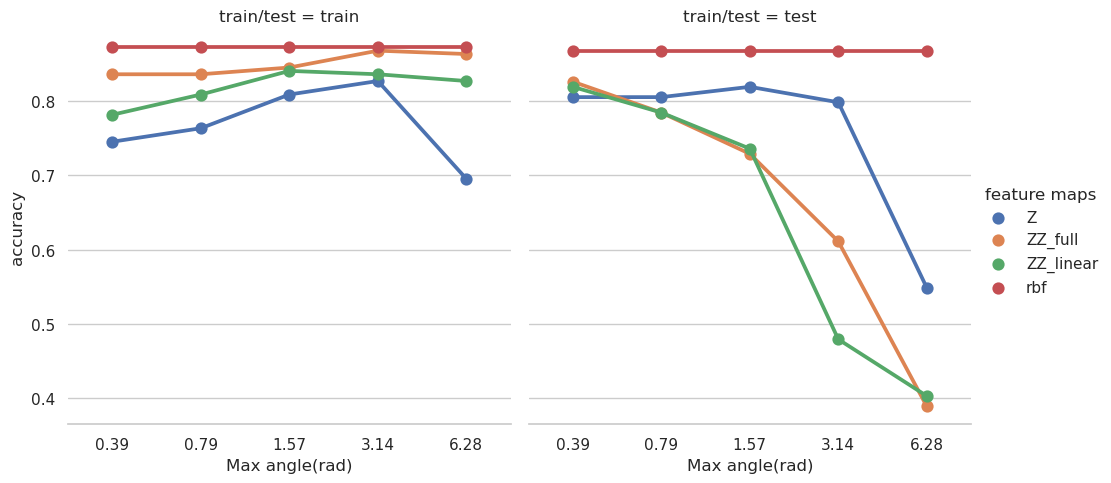

In [16]:
##Plot ACCURACY
# Draw a pointplot to show pulse as a function of three categorical factors
sns.set_theme(style="whitegrid")
g4 = sns.catplot(data=df_sup_melt_1000.loc[df_sup_melt_1000.N_classes=='4_classes'].sort_values(by='train/test',ascending=False), x="Bandwidth", y="accuracy", hue="feature maps", 
                col='train/test',capsize=.2,kind="point")

g4.despine(left=True)
#g4.set(ylim=(0.4,0.9))
g4.set(xlabel='Max angle(rad)')
plt.show()


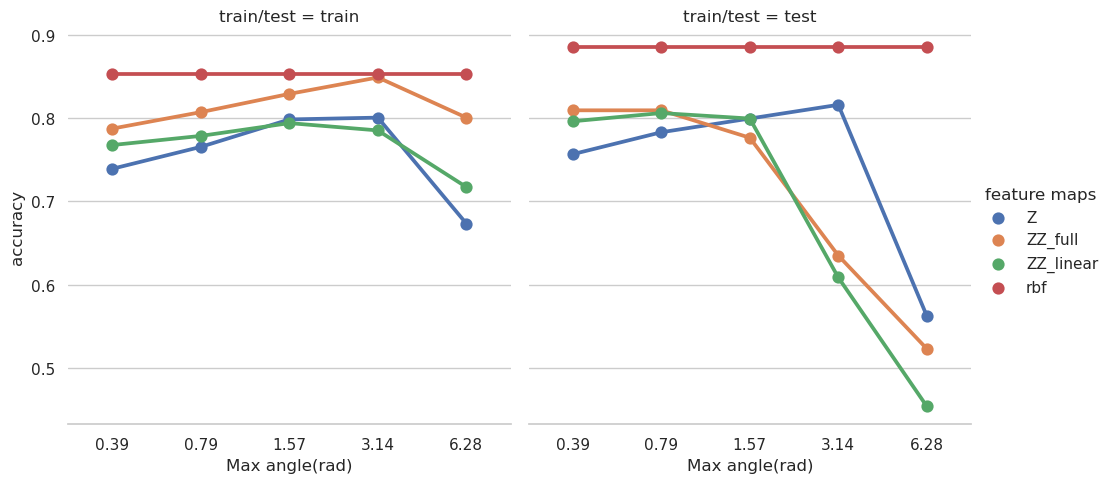

In [12]:
##Plot ACCURACY
# Draw a pointplot to show pulse as a function of three categorical factors
sns.set_theme(style="whitegrid")
g4 = sns.catplot(data=df_sup_melt_1980.loc[df_sup_melt_1980.N_classes=='4_classes'].sort_values(by='train/test',ascending=False), x="Bandwidth", y="accuracy", hue="feature maps", 
                col='train/test',capsize=.2,kind="point")

g4.despine(left=True)
g4.set(xlabel='Max angle(rad)')
plt.show()


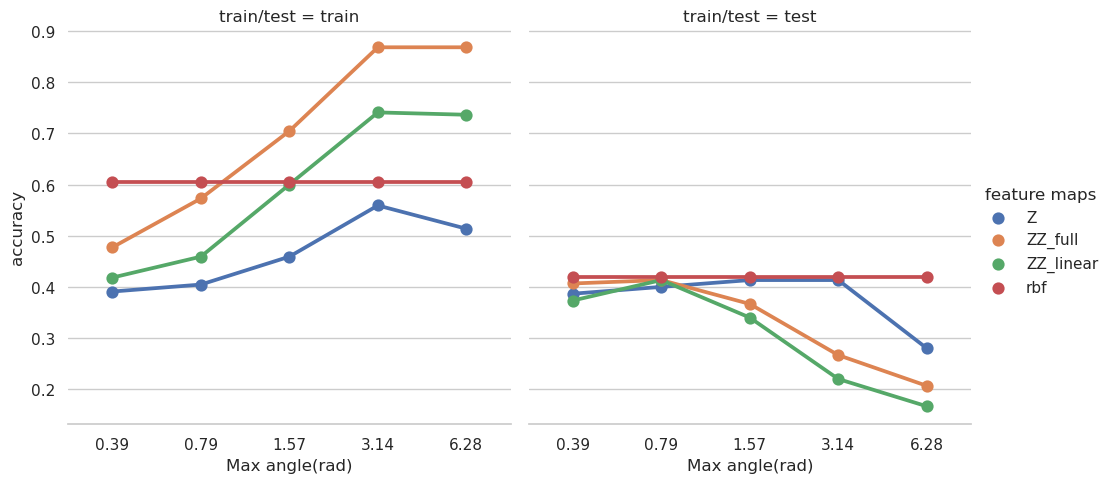

In [17]:
sns.set_theme(style="whitegrid")
g10 = sns.catplot(data=df_sup_melt_1000.loc[df_sup_melt_1000.N_classes=='10_classes'].sort_values(by='train/test',ascending=False), x="Bandwidth", y="accuracy", hue="feature maps", 
                col='train/test',capsize=.2,kind="point")

g10.despine(left=True)
g10.set(xlabel='Max angle(rad)')
plt.show()

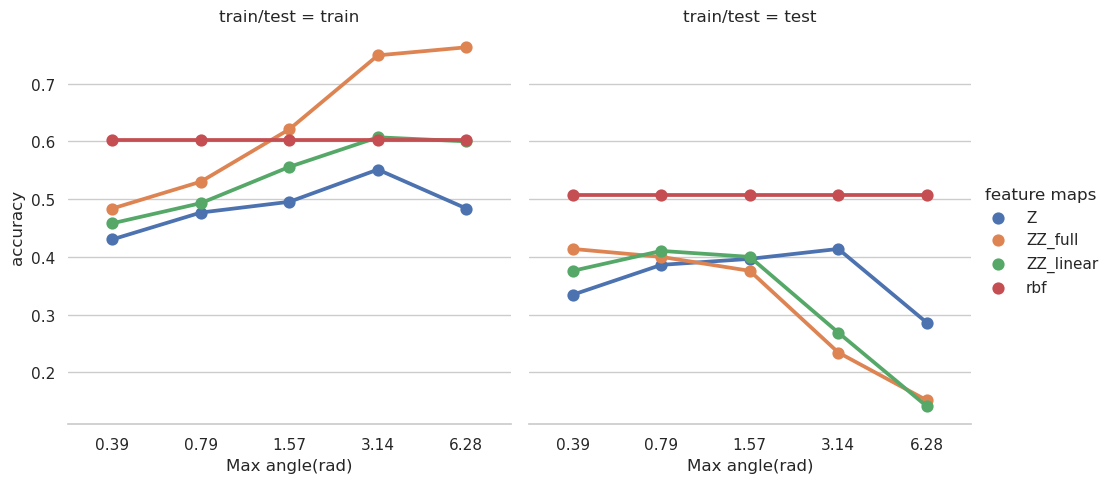

In [18]:
sns.set_theme(style="whitegrid")
g10 = sns.catplot(data=df_sup_melt_1980.loc[df_sup_melt_1980.N_classes=='10_classes'].sort_values(by='train/test',ascending=False), x="Bandwidth", y="accuracy", hue="feature maps", 
                col='train/test',capsize=.2,kind="point")

g10.despine(left=True)
g10.set(xlabel='Max angle(rad)')
plt.show()

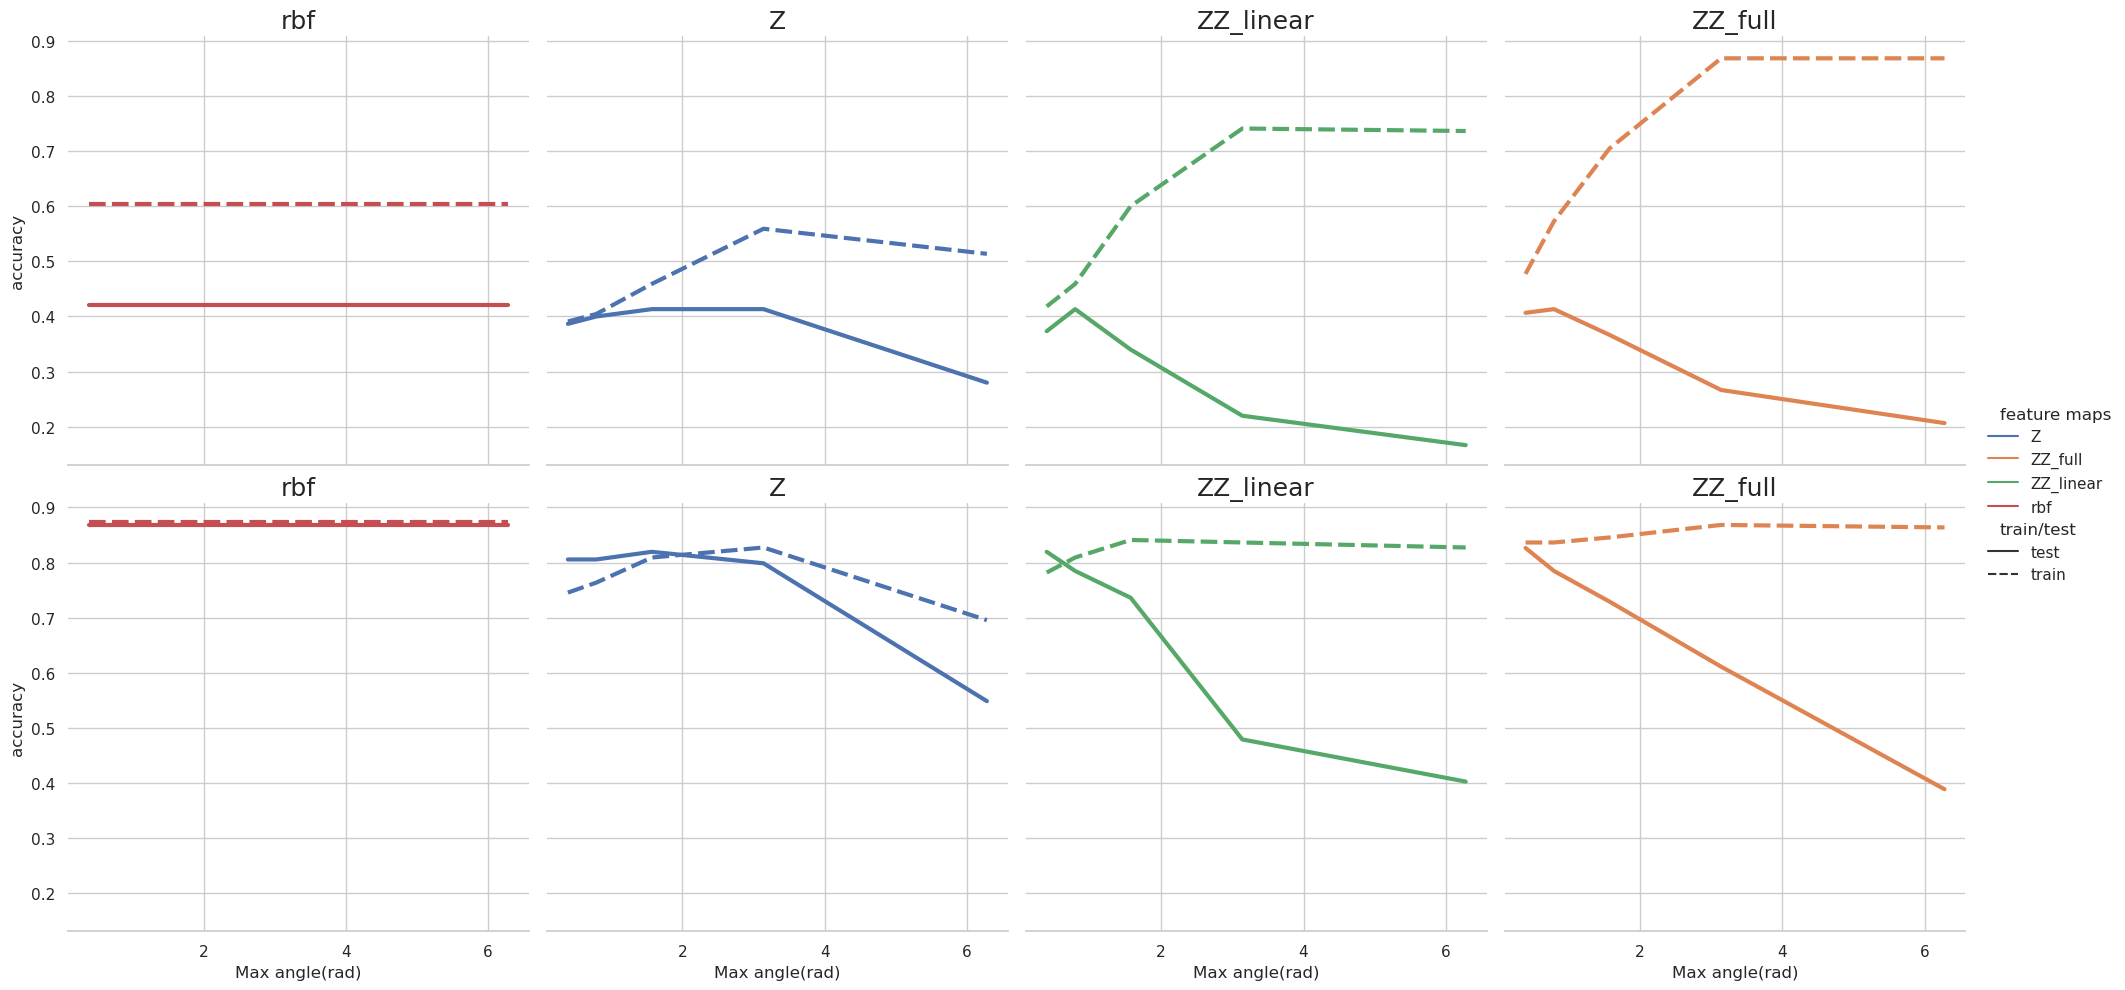

In [9]:
plt.close()
col_order = ['rbf', 'Z','ZZ_linear', 'ZZ_full']
sns.set_theme(style="whitegrid")

acc=sns.relplot(data=df_sup_melt_1000, x="Bandwidth", y="accuracy", row="N_classes",col='feature maps',hue='feature maps',
                style='train/test',kind="line",col_order=col_order,linewidth = 3)
acc.despine(left=True)
acc.set(xlabel='Max angle(rad)')

# Set labels for each row
sns.set(font_scale=1.5)
row_labels=['10 classes', '4 classes']
for ax, label in zip(acc.axes.flat, col_order*2):
    ax.set_title(label)
    


#plt.savefig('../Results/images/Accuracy_sup.png')

plt.show()

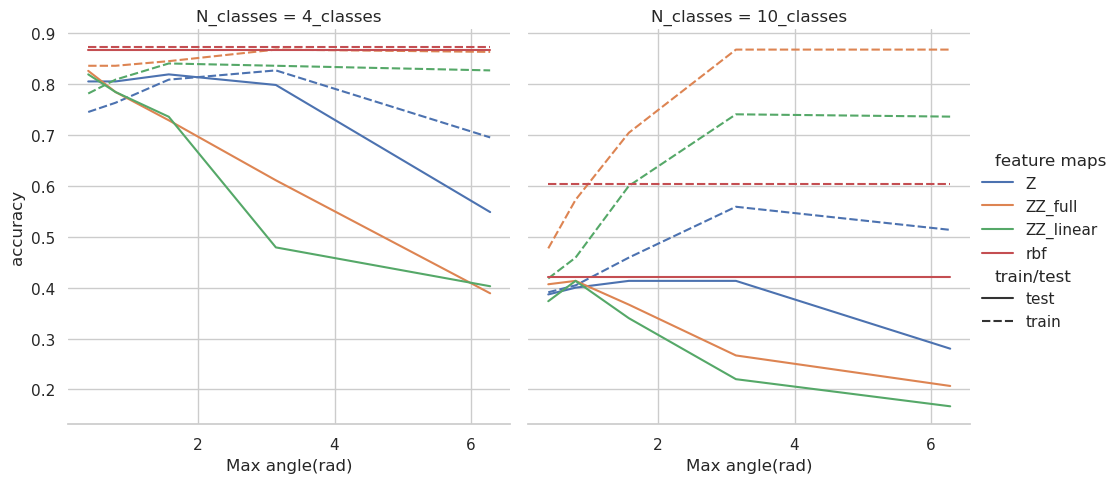

In [10]:
plt.close()
col_order = ['4_classes', '10_classes']
sns.set_theme(style="whitegrid")

acc=sns.relplot(data=df_sup_melt_1000, x="Bandwidth", y="accuracy", col="N_classes",hue='feature maps',
                style='train/test',kind="line",col_order=col_order,linewidth = 1.5)
acc.despine(left=True)
acc.set(xlabel='Max angle(rad)')

# Set labels for each row
sns.set(font_scale=1.5)
# row_labels=['10 classes', '4 classes']
# for ax, label in zip(acc.axes.flat, col_order):
#     ax.set_title(label)
    


#plt.savefig('../Results/images/Accuracy_sup_2.png')

plt.show()

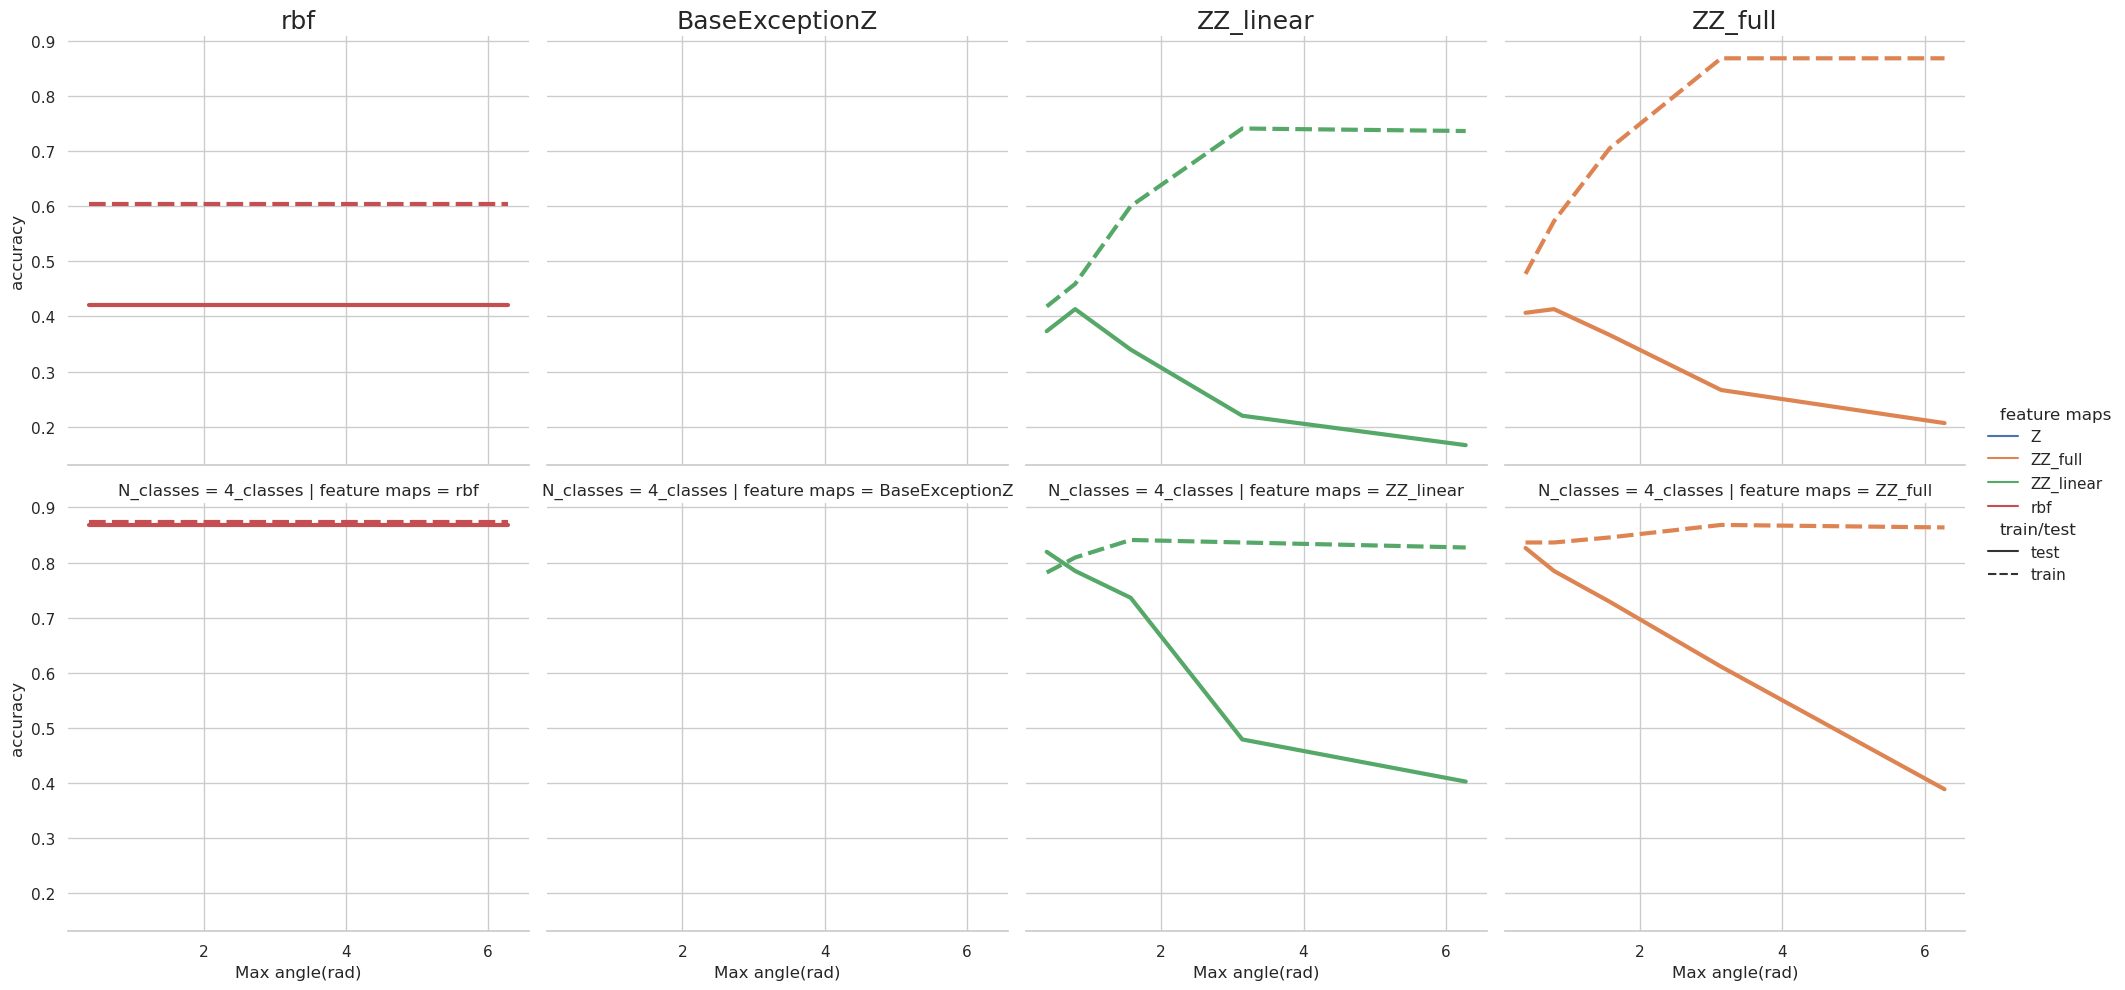

In [11]:
plt.close()
col_order = ['rbf','BaseExceptionZ','ZZ_linear', 'ZZ_full']
sns.set_theme(style="whitegrid")

acc=sns.relplot(data=df_sup_melt_1000, x="Bandwidth", y="accuracy", row="N_classes",col='feature maps',hue='feature maps',
                style='train/test',kind="line",col_order=col_order,linewidth = 3)
acc.despine(left=True)
acc.set(xlabel='Max angle(rad)')

# Set labels for each row
sns.set(font_scale=1.5)
row_labels=['10 classes', '4 classes']
for ax, label in zip(acc.axes.flat, col_order):
    ax.set_title(label)
    


#plt.savefig('../Results/images/Accuracy_sup.png')

plt.show()

In [ ]:
rbf_data_4_test = df_sup_melt_1000[(df_sup_melt_1000['feature maps'] == 'rbf') & (df_sup_melt_1000['N_classes'] == '4_classes') & (df_sup_melt_1000['train/test']=='test')]
rbf_data_4_train = df_sup_melt_1000[(df_sup_melt_1000['feature maps'] == 'rbf') & (df_sup_melt_1000['N_classes'] == '4_classes') & (df_sup_melt_1000['train/test']=='train')]

rbf_data_10_test = df_sup_melt_1000[(df_sup_melt_1000['feature maps'] == 'rbf') & (df_sup_melt_1000['N_classes'] == '10_classes') & (df_sup_melt_1000['train/test']=='test')]
rbf_data_10_train = df_sup_melt_1000[(df_sup_melt_1000['feature maps'] == 'rbf') & (df_sup_melt_1000['N_classes'] == '10_classes') & (df_sup_melt_1000['train/test']=='train')]

(<Axes: title={'center': 'N_classes = 10_classes | feature maps = Z'}, xlabel='Max angle(rad)', ylabel='accuracy'>,)
(<Axes: title={'center': 'N_classes = 10_classes | feature maps = ZZ_linear'}, xlabel='Max angle(rad)'>,)
(<Axes: title={'center': 'N_classes = 10_classes | feature maps = ZZ_full'}, xlabel='Max angle(rad)'>,)
(<Axes: title={'center': 'N_classes = 4_classes | feature maps = Z'}, xlabel='Max angle(rad)', ylabel='accuracy'>,)
(<Axes: title={'center': 'N_classes = 4_classes | feature maps = ZZ_linear'}, xlabel='Max angle(rad)'>,)
(<Axes: title={'center': 'N_classes = 4_classes | feature maps = ZZ_full'}, xlabel='Max angle(rad)'>,)


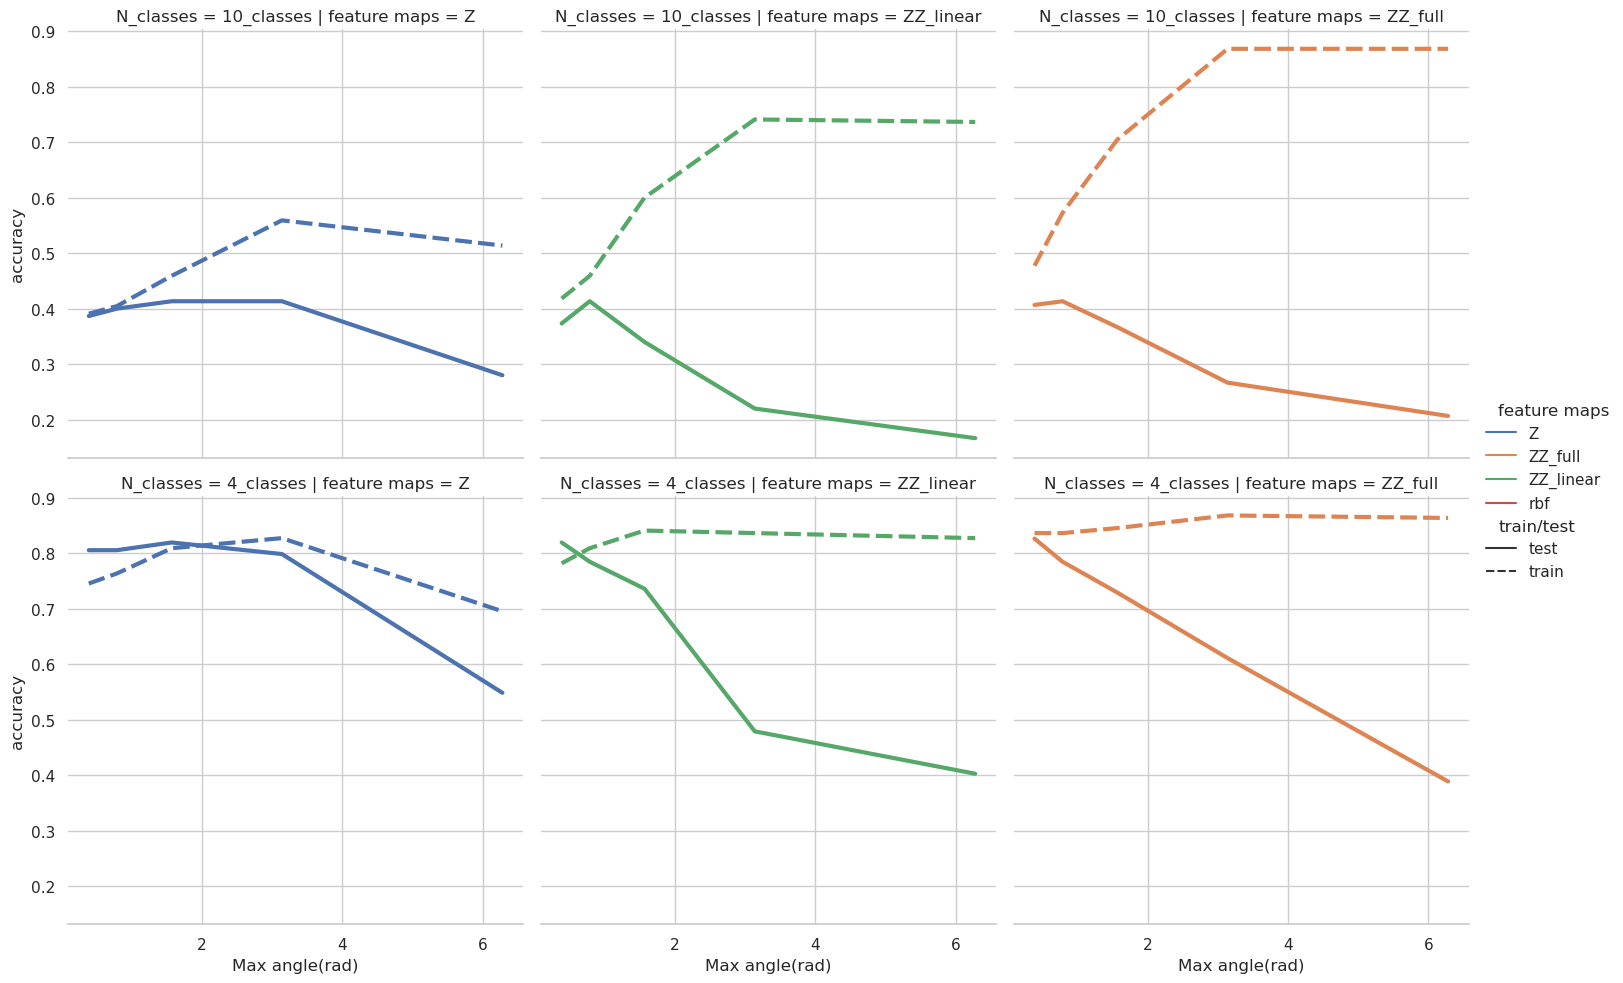

In [12]:
col_order = ['Z','ZZ_linear', 'ZZ_full']
row_labels = ['10_classes', '4_classes']

sns.set_theme(style="whitegrid")

acc = sns.relplot(
    data=df_sup_melt_1000, x="Bandwidth", y="accuracy", row="N_classes", col='feature maps', hue='feature maps',
    style='train/test', kind="line", col_order=col_order, linewidth=3
)
acc.despine(left=True)
acc.set(xlabel='Max angle(rad)')

sns.set(font_scale=1.5)
for ax in zip(acc.axes.flat):
     print(ax)
     #ax.set_title(label)
     rbf_data = df_sup_melt_1000[(df_sup_melt_1000['feature maps'] == 'rbf') & (df_sup_melt_1000['N_classes'] == label)]
     sns.lineplot(data=rbf_data, x="Bandwidth", y="accuracy", color='red', linewidth=3, ax=ax, legend=False)


plt.show()

In [ ]:
import seaborn as sns

col_order = ['Z','ZZ_linear', 'ZZ_full']
row_labels = ['10_classes', '4_classes']

sns.set_theme(style="whitegrid")

acc = sns.relplot(
    data=df_sup_melt_1000, x="Bandwidth", y="accuracy", row="N_classes", col='feature maps', hue='feature maps',
    style='train/test', kind="line", col_order=col_order, linewidth=1.5
)
acc.despine(left=True)
acc.set(xlabel='Max angle(rad)')

# Set labels for each row
sns.set(font_scale=1.5)
for i, label in enumerate(row_labels):
    rbf_data_test = df_sup_melt_1000[(df_sup_melt_1000['feature maps'] == 'rbf') & (df_sup_melt_1000['N_classes'] == label) & (df_sup_melt_1000['train/test']=='test')]
    rbf_data_train = df_sup_melt_1000[(df_sup_melt_1000['feature maps'] == 'rbf') & (df_sup_melt_1000['N_classes'] == label) & (df_sup_melt_1000['train/test']=='train')]
    ax = acc.facet_axis(i, 0)
    ax2 = acc.facet_axis(i,1 )
    ax3 = acc.facet_axis(i,2 )

    ax.plot(rbf_data_test['Bandwidth'], rbf_data_test['accuracy'], '-',color='red', linewidth=1.5, label='rbf')
    ax2.plot(rbf_data_test['Bandwidth'], rbf_data_test['accuracy'],'-', color='red', linewidth=1.5, label='rbf')
    ax3.plot(rbf_data_test['Bandwidth'], rbf_data_test['accuracy'],'-', color='red', linewidth=1.5, label='rbf')
    #Train
    ax.plot(rbf_data_train['Bandwidth'], rbf_data_train['accuracy'], '--',color='red', linewidth=1.5, label='rbf')
    ax2.plot(rbf_data_train['Bandwidth'], rbf_data_train['accuracy'],'--', color='red', linewidth=1.5, label='rbf')
    ax3.plot(rbf_data_train['Bandwidth'], rbf_data_train['accuracy'],'--', color='red', linewidth=1.5, label='rbf')


#plt.legend()
plt.show()


In [ ]:
df_sup_melt_1000[(df_sup_melt_1000['feature maps'] == 'rbf') & (df_sup_melt_1000['N_classes'] == label) & (df_sup_melt_1000['train/test']=='test') ]

# Pair Plots first 4 components

In [ ]:
data_input = pd.read_csv("../Input_data/PCA_METABRIC_20cmp_IC10.csv", sep = ",")
n_qubits=2

#SELECT FT
features=[]
for i in range(1,n_qubits+1):
    name_cna='Component_'+str(i)+'_cna'
    name_exp='Component_'+str(i)+'_exp'
    features.append(name_cna)
    features.append(name_exp)
labels = 'IntClustMemb'

#Full classes
df_tot_sel_10=data_input
#select 4 classes
df_tot_sel_4=data_input.loc[(data_input.IntClustMemb == 8) | 
                          (data_input.IntClustMemb == 10)| 
                          (data_input.IntClustMemb == 4)|
                          (data_input.IntClustMemb == 5)]

# Cose

In [ ]:
g_pair=sns.pairplot(data=df_tot_sel_10[features+[labels]], 
                    hue=labels,
                    palette=sns.color_palette("Paired"))
#g_pair.savefig("PCA_pairplot_IC10_10classes.png") 
plt.show()
plt.close()

Divergence

In [ ]:
#Split data 4 classes
tr_size=70
ts_size=70
X_train_4,y_train_4,X_test_4,y_test_4=Split_and_sample(df_tot_sel_4,
                                                       features,
                                                       labels,
                                                       tr_sz=0.6,ts_sz=0.4,
                                                       tr_size=tr_size,ts_size=ts_size)
#Split data 10 classes
X_train_10,y_train_10,X_test_10,y_test_10=Split_and_sample(df_tot_sel_10,
                                                           features,
                                                           labels,
                                                           tr_sz=0.6,ts_sz=0.4,
                                                           tr_size=tr_size,ts_size=ts_size)

In [ ]:
qkernel=Load_kernels('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Kernels_Results/Bandwidth/Z_linear_4_classes/bandwidth_k/qk_tot_tr_pi_0.39.pickle')
#ckernel_2=Load_kernels('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Kernels_Results/Bandwidth/Sampled_data/ZZ_full/bandwidth_k/qk_tot_pi_6.28.pickle')

In [ ]:
plt.close()
plt.imshow(np.asmatrix(qkernel), interpolation="nearest", origin="upper", cmap="Blues")
plt.title("Z_linear kernel matrix")
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(
     np.asmatrix(qkernel), interpolation="nearest", origin="upper", cmap="Blues",vmin=0, vmax=1)
axs[0].set_title("Z_linear kernel matrix")
axs[1].imshow(np.asmatrix(K_classic_tr), interpolation="nearest", origin="upper", cmap="Blues")
axs[1].set_title("rbf kernel matrix")
cbar1 = fig.colorbar(im2, ax=axs[1])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first subplot
im1 = axs[0].imshow(np.asmatrix(qkernel), interpolation="nearest", origin="upper", cmap="Blues",vmin=0, vmax=1)
axs[0].set_title("Z_linear kernel matrix")
cbar1 = fig.colorbar(im1, ax=axs[0])
#cbar1.set_

# Plot the second subplot
im2 = axs[1].imshow(np.asmatrix(K_classic_tr), interpolation="nearest", origin="upper", cmap="Blues",vmin=0, vmax=1)
axs[1].set_title("rbf kernel matrix")
cbar2 = fig.colorbar(im2, ax=axs[1])

# Add a main title to the entire figure
fig.suptitle("Comparison of Kernel Matrices")

#plt.colorbar(im2)
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot
im1 = axs[0].imshow(np.asmatrix(qkernel), interpolation="nearest", origin="upper", cmap="Blues")
axs[0].set_title("Z_linear kernel matrix")
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar1.set_clim(np.min(qkernel), np.max(K_classic_tr))

# Plot the second subplot
im2 = axs[1].imshow(np.asmatrix(K_classic_tr), interpolation="nearest", origin="upper", cmap="Blues")
axs[1].set_title("rbf kernel matrix")
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar2.set_clim(np.min(qkernel), np.max(K_classic_tr))

# Add a main title to the entire figure
fig.suptitle("Comparison of Kernel Matrices")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:

plt.close()
#train e test sono due #pandas dataframe
#features è la lista delle feature dei dati su cui vuoi calcolare la JSD
jsd_dict = {}
for col in features:
    d1 = X_train_10[col].to_numpy()
    d2 = df_tot_sel_10[col].to_numpy()
    jsd_dict[col] = js_div(d1, d2)
#JSD = 0 --> distribuzioni completamente uguali
#JSD = 1 --> distribuzioni completamente diverse
#Plotta la divergenza calcolata prima con matplotlib
plt.figure(figsize = (6,4))
plt.hist(list(jsd_dict.values()), bins=50)
plt.xlabel('Jensen-Shannon Divergence')
plt.ylabel('Frequency')
plt.title('Histogram of JS Divergence between Sampled and Whole sets features')
plt.show()

In [ ]:
s1 = pd.merge(df_tot_sel_10,X_train_4 , how='inner', on=features)

In [ ]:
s1